In [10]:
import sklearn; print('The scikit-learn version is {}.'.format(sklearn.__version__))
import skimage; print('The scikit-image version is {}.'.format(skimage.__version__))
!pip install -U -q PyDrive

The scikit-learn version is 0.19.1.
The scikit-image version is 0.13.1.


In [0]:
FILE_TRAIN = 'sign_mnist_train.csv'
FILE_TEST = 'sign_mnist_test.csv'

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#2. Get the files
downloadedTrain = drive.CreateFile({'id':'1IubKywSmZXpdtWXgpPfPOjHkARW81gZ1'}) 
downloadedTrain.GetContentFile( FILE_TRAIN )  

downloadedTest = drive.CreateFile({'id':'1wGoen4pVlLaJb382nlbtTA2x9-q5WhzR'}) 
downloadedTest.GetContentFile( FILE_TEST )  



In [0]:
# #upload files form local drive
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [4]:
#import os
#SIGNLANG_PATH = "datasets/signLang"


import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from time import time
import warnings
warnings.filterwarnings("ignore")

## Load train data
signs_train = pd.read_csv( FILE_TRAIN )
signs_train.info()
print("\nTraining data array shape: ",signs_train.shape)
print("Training data length: ",len(signs_train.index))
print("\n")

signs_test = pd.read_csv( FILE_TEST )
signs_test.info()
print("\nTesting data array shape: ",signs_test.shape)
print("Testing data length: ",len(signs_test.index))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB

Training data array shape:  (27455, 785)
Training data length:  27455


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB

Testing data array shape:  (7172, 785)
Testing data length:  7172


In [0]:
## Process data
#extract labels column into y
y_train = signs_train.loc[:,'label']
y_test = signs_test.loc[:,'label']

#extract pixel array into X
X_train= signs_train
X_train.drop('label',axis=1,inplace=True)
X_test= signs_test
X_test.drop('label',axis=1,inplace=True)

In [0]:
##Convert Pandas dataframe to np array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


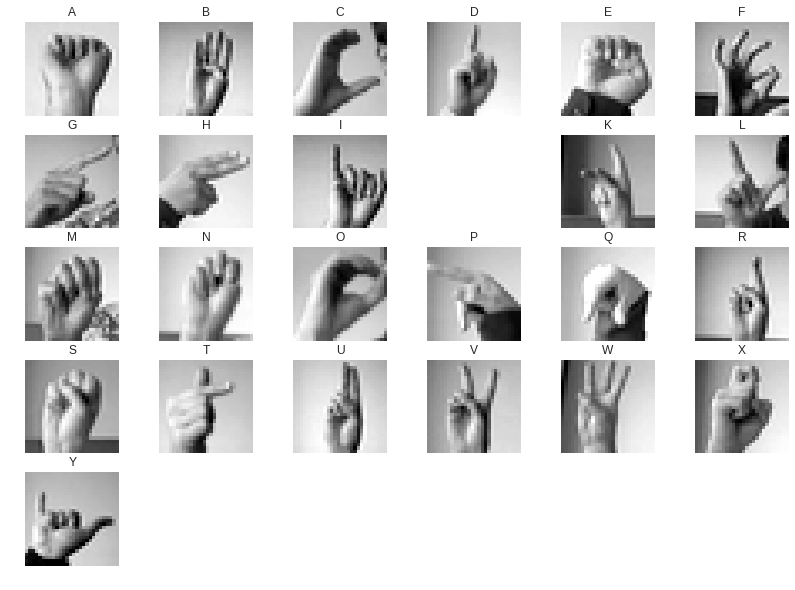

In [7]:
# Display all sign language alphabet
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from skimage.feature import hog

fig = plt.figure(figsize=(14, 10))
for index in range(0, 26):
    # find first element of letter and get index inside y_train[]
    signIndex = next((i for i in range(1000) if y_train[i] == index), None)
    #print(index, signIndex)
    if index == 0:
        SIGN_A = signIndex
    if signIndex == None:
        continue
    nextSign = X_train[signIndex]
    nextSignImage = nextSign.reshape(28,28)
    #fd, nextSignImageHOG = hog(nextSignImage, visualise=True,pixels_per_cell=(7, 7))
    plt.subplot(5, 6, index+1)
    plt.axis('off')
    plt.imshow(nextSignImage, cmap = matplotlib.cm.gray, interpolation="nearest")
  #  plt.imshow(nextSignImageHOG, cmap = matplotlib.cm.gray, interpolation="nearest")
    plt.title('%c' % (65+index))
plt.show()

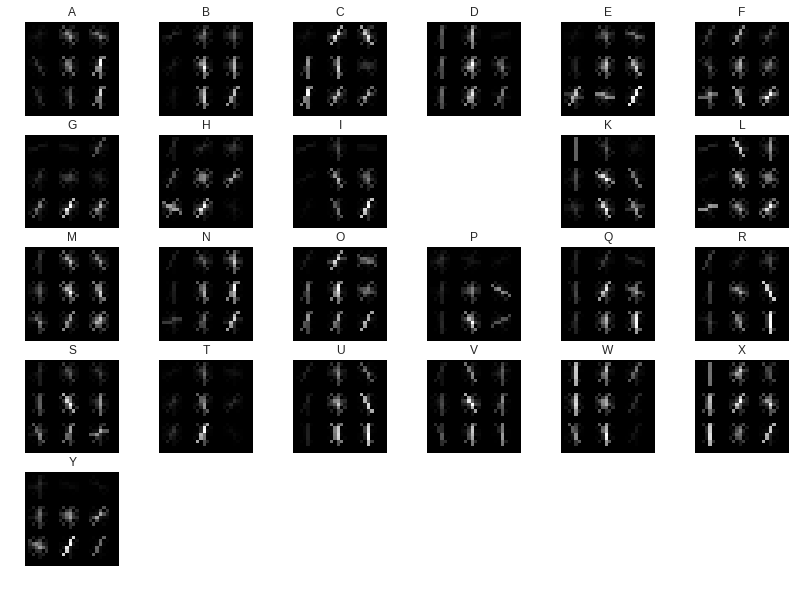

In [8]:
# Display all sign language alphabet
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from skimage.feature import hog

fig = plt.figure(figsize=(14, 10))
for index in range(0, 26):
    # find first element of letter and get index inside y_train[]
    signIndex = next((i for i in range(1000) if y_train[i] == index), None)
    #print(index, signIndex)
    if index == 0:
        SIGN_A = signIndex
    if signIndex == None:
        continue
    nextSign = X_train[signIndex]
    nextSignImage = nextSign.reshape(28,28)
    fd, nextSignImageHOG = hog(nextSignImage, visualise=True,pixels_per_cell=(9, 9))
    plt.subplot(5, 6, index+1)
    plt.axis('off')
    #plt.imshow(nextSignImage, cmap = matplotlib.cm.gray, interpolation="nearest")
    plt.imshow(nextSignImageHOG, cmap = matplotlib.cm.gray, interpolation="nearest")
    plt.title('%c' % (65+index))
plt.show()

# HOG

In [9]:
## Converting all train dataset to HOG
from time import time
import numpy as np
from skimage.feature import hog

t0 = time()
X_train_hog=np.zeros(len(X_train),)
X_train_reshape = X_train.reshape(len(X_train),28,28)
hog_transf = X_train_reshape

for i in range(0,len(X_train)):
    fda, hog_transf[i] = hog( X_train_reshape[i], visualise=True, pixels_per_cell=(9, 9))
    
X_train_hog = hog_transf.reshape(len(X_train),len(X_train[0,]))     
print("HOG X_train transform done in %0.3fs" % (time() - t0))   
print(X_train_hog.shape)

KeyboardInterrupt: ignored

In [10]:
## Converting all test dataset to HOG
from skimage.feature import hog

t0 = time()
X_test_hog=np.zeros(len(X_test),)
X_test_reshape = X_test.reshape(len(X_test),28,28)
X_test_hog_transf = X_test_reshape

for i in range(0,len(X_test)):
    fda, X_test_hog_transf[i] = hog( X_test_reshape[i], visualise=True, pixels_per_cell=(9, 9))
    
X_test_hog = X_test_hog_transf.reshape(len(X_test),len(X_test[0,]))     
print("HOG X_test transform done in %0.3fs" % (time() - t0))   
print(X_test_hog.shape)

HOG X_test transform done in 16.551s
(7172, 784)


In [0]:
# re-assign hog arrays to X_train and X_test
X_train = X_train_hog
X_test = X_test_hog

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

t0 = time()
t00 = t0
param_grid = [{
             'alpha': [0.0001, 0.05, 1], 
             'epsilon': [10, 1.0, 0.1, 0.001],
             # 'loss': ["hinge", "log","modified_huber","squared_hinge","perceptron"],
              'max_iter':[30, 50, 70], 
             'penalty':["none", "l2", "l1", "elasticnet"],
             # 'power_t':[0.1, 1.0]
              }]

sgd_clf_turbo = SGDClassifier(random_state = 42)
grid_search = GridSearchCV(sgd_clf_turbo, param_grid, cv=3, verbose=3)
grid_search.fit(X_train, y_train)
print("SGDClassifier Fit done in %0.3fs" % (time() - t0))   

# train for multi-class classification
# sgd_clf_turbo.fit(X_train, y_train)
# print("Fit done in %0.3fs" % (time() - t0))
# t0 = time()  
# #cross-validation using K-fold with n folds
# from sklearn.model_selection import cross_val_score
# # Cross-validate SGDClassifier accuracy using cross_val_score()
# print("Cross validation = ",cross_val_score(sgd_clf_turbo, X_train, y_train, cv=3, scoring="accuracy"))
# print("Cross Validation done in %0.3fs" % (time() - t0))
# t0 = time()                         
                        
# print("testing SGD classifier accuracy...")
# print(sgd_clf_turbo.score(X_test, y_test,sample_weight=None))
# print("Test accuracy done in %0.3fs" % (time() - t0))
# print("Total time: %0.3fs" % (time() - t00))    


t0 = time() 
print(grid_search.score(X_test, y_test))
print(grid_search.best_params_)
print(grid_search.best_score_)
print("Test accuracy done in %0.3fs" % (time() - t0))

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] alpha=0.0001, epsilon=10, max_iter=30, penalty=none .............
[CV]  alpha=0.0001, epsilon=10, max_iter=30, penalty=none, score=0.9073346430910282, total=  15.8s
[CV] alpha=0.0001, epsilon=10, max_iter=30, penalty=none .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.9s remaining:    0.0s


[CV]  alpha=0.0001, epsilon=10, max_iter=30, penalty=none, score=0.9144449300699301, total=  16.0s
[CV] alpha=0.0001, epsilon=10, max_iter=30, penalty=none .............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   32.0s remaining:    0.0s


[CV]  alpha=0.0001, epsilon=10, max_iter=30, penalty=none, score=0.9112788535171207, total=  16.0s
[CV] alpha=0.0001, epsilon=10, max_iter=30, penalty=l2 ...............
[CV]  alpha=0.0001, epsilon=10, max_iter=30, penalty=l2, score=0.8898712071600088, total=  16.0s
[CV] alpha=0.0001, epsilon=10, max_iter=30, penalty=l2 ...............
[CV]  alpha=0.0001, epsilon=10, max_iter=30, penalty=l2, score=0.8389423076923077, total=  16.0s
[CV] alpha=0.0001, epsilon=10, max_iter=30, penalty=l2 ...............
[CV]  alpha=0.0001, epsilon=10, max_iter=30, penalty=l2, score=0.8931189147795646, total=  16.2s
[CV] alpha=0.0001, epsilon=10, max_iter=30, penalty=l1 ...............
[CV]  alpha=0.0001, epsilon=10, max_iter=30, penalty=l1, score=0.9067889107181838, total=  43.1s
[CV] alpha=0.0001, epsilon=10, max_iter=30, penalty=l1 ...............
[CV]  alpha=0.0001, epsilon=10, max_iter=30, penalty=l1, score=0.9140078671328671, total=  43.4s
[CV] alpha=0.0001, epsilon=10, max_iter=30, penalty=l1 ......

[CV]  alpha=0.0001, epsilon=10, max_iter=70, penalty=elasticnet, score=0.9055901980089706, total= 1.7min
[CV] alpha=0.0001, epsilon=1.0, max_iter=30, penalty=none ............
[CV]  alpha=0.0001, epsilon=1.0, max_iter=30, penalty=none, score=0.9073346430910282, total=  16.1s
[CV] alpha=0.0001, epsilon=1.0, max_iter=30, penalty=none ............
[CV]  alpha=0.0001, epsilon=1.0, max_iter=30, penalty=none, score=0.9144449300699301, total=  16.0s
[CV] alpha=0.0001, epsilon=1.0, max_iter=30, penalty=none ............
[CV]  alpha=0.0001, epsilon=1.0, max_iter=30, penalty=none, score=0.9112788535171207, total=  15.9s
[CV] alpha=0.0001, epsilon=1.0, max_iter=30, penalty=l2 ..............
[CV]  alpha=0.0001, epsilon=1.0, max_iter=30, penalty=l2, score=0.8898712071600088, total=  16.1s
[CV] alpha=0.0001, epsilon=1.0, max_iter=30, penalty=l2 ..............
[CV]  alpha=0.0001, epsilon=1.0, max_iter=30, penalty=l2, score=0.8389423076923077, total=  16.0s
[CV] alpha=0.0001, epsilon=1.0, max_iter=30,

[CV]  alpha=0.0001, epsilon=1.0, max_iter=70, penalty=l1, score=0.912482222951537, total= 1.7min
[CV] alpha=0.0001, epsilon=1.0, max_iter=70, penalty=elasticnet ......
[CV]  alpha=0.0001, epsilon=1.0, max_iter=70, penalty=elasticnet, score=0.898166339227243, total= 1.7min
[CV] alpha=0.0001, epsilon=1.0, max_iter=70, penalty=elasticnet ......
[CV]  alpha=0.0001, epsilon=1.0, max_iter=70, penalty=elasticnet, score=0.9159746503496503, total= 1.7min
[CV] alpha=0.0001, epsilon=1.0, max_iter=70, penalty=elasticnet ......
[CV]  alpha=0.0001, epsilon=1.0, max_iter=70, penalty=elasticnet, score=0.9055901980089706, total= 1.7min
[CV] alpha=0.0001, epsilon=0.1, max_iter=30, penalty=none ............
[CV]  alpha=0.0001, epsilon=0.1, max_iter=30, penalty=none, score=0.9073346430910282, total=  15.8s
[CV] alpha=0.0001, epsilon=0.1, max_iter=30, penalty=none ............
[CV]  alpha=0.0001, epsilon=0.1, max_iter=30, penalty=none, score=0.9144449300699301, total=  16.0s
[CV] alpha=0.0001, epsilon=0.1,

[CV]  alpha=0.0001, epsilon=0.1, max_iter=70, penalty=l2, score=0.9029646646975167, total=  37.0s
[CV] alpha=0.0001, epsilon=0.1, max_iter=70, penalty=l1 ..............
[CV]  alpha=0.0001, epsilon=0.1, max_iter=70, penalty=l1, score=0.9118096485483519, total= 1.7min
[CV] alpha=0.0001, epsilon=0.1, max_iter=70, penalty=l1 ..............
[CV]  alpha=0.0001, epsilon=0.1, max_iter=70, penalty=l1, score=0.9130244755244755, total= 1.7min
[CV] alpha=0.0001, epsilon=0.1, max_iter=70, penalty=l1 ..............
[CV]  alpha=0.0001, epsilon=0.1, max_iter=70, penalty=l1, score=0.912482222951537, total= 1.7min
[CV] alpha=0.0001, epsilon=0.1, max_iter=70, penalty=elasticnet ......
[CV]  alpha=0.0001, epsilon=0.1, max_iter=70, penalty=elasticnet, score=0.898166339227243, total= 1.7min
[CV] alpha=0.0001, epsilon=0.1, max_iter=70, penalty=elasticnet ......
[CV]  alpha=0.0001, epsilon=0.1, max_iter=70, penalty=elasticnet, score=0.9159746503496503, total= 1.7min
[CV] alpha=0.0001, epsilon=0.1, max_iter=70

[CV]  alpha=0.0001, epsilon=0.001, max_iter=70, penalty=none, score=0.9125916201728476, total=  37.0s
[CV] alpha=0.0001, epsilon=0.001, max_iter=70, penalty=l2 ............
[CV]  alpha=0.0001, epsilon=0.001, max_iter=70, penalty=l2, score=0.887142545295787, total=  37.0s
[CV] alpha=0.0001, epsilon=0.001, max_iter=70, penalty=l2 ............
[CV]  alpha=0.0001, epsilon=0.001, max_iter=70, penalty=l2, score=0.911166958041958, total=  36.9s
[CV] alpha=0.0001, epsilon=0.001, max_iter=70, penalty=l2 ............
[CV]  alpha=0.0001, epsilon=0.001, max_iter=70, penalty=l2, score=0.9029646646975167, total=  37.2s
[CV] alpha=0.0001, epsilon=0.001, max_iter=70, penalty=l1 ............
[CV]  alpha=0.0001, epsilon=0.001, max_iter=70, penalty=l1, score=0.9118096485483519, total= 1.7min
[CV] alpha=0.0001, epsilon=0.001, max_iter=70, penalty=l1 ............
[CV]  alpha=0.0001, epsilon=0.001, max_iter=70, penalty=l1, score=0.9130244755244755, total= 1.7min
[CV] alpha=0.0001, epsilon=0.001, max_iter=70

[CV]  alpha=0.05, epsilon=10, max_iter=50, penalty=elasticnet, score=0.8261678153374904, total= 1.2min
[CV] alpha=0.05, epsilon=10, max_iter=70, penalty=none ...............
[CV]  alpha=0.05, epsilon=10, max_iter=70, penalty=none, score=0.6836935166994106, total=  37.6s
[CV] alpha=0.05, epsilon=10, max_iter=70, penalty=none ...............
[CV]  alpha=0.05, epsilon=10, max_iter=70, penalty=none, score=0.7638767482517482, total=  37.1s
[CV] alpha=0.05, epsilon=10, max_iter=70, penalty=none ...............
[CV]  alpha=0.05, epsilon=10, max_iter=70, penalty=none, score=0.730992232797287, total=  37.4s
[CV] alpha=0.05, epsilon=10, max_iter=70, penalty=l2 .................
[CV]  alpha=0.05, epsilon=10, max_iter=70, penalty=l2, score=0.8923815760750927, total=  37.6s
[CV] alpha=0.05, epsilon=10, max_iter=70, penalty=l2 .................
[CV]  alpha=0.05, epsilon=10, max_iter=70, penalty=l2, score=0.9023164335664335, total=  38.0s
[CV] alpha=0.05, epsilon=10, max_iter=70, penalty=l2 .........

[CV]  alpha=0.05, epsilon=1.0, max_iter=50, penalty=l1, score=0.47259599606170005, total= 1.2min
[CV] alpha=0.05, epsilon=1.0, max_iter=50, penalty=elasticnet ........
[CV]  alpha=0.05, epsilon=1.0, max_iter=50, penalty=elasticnet, score=0.7977515826238812, total= 1.2min
[CV] alpha=0.05, epsilon=1.0, max_iter=50, penalty=elasticnet ........
[CV]  alpha=0.05, epsilon=1.0, max_iter=50, penalty=elasticnet, score=0.8129370629370629, total= 1.2min
[CV] alpha=0.05, epsilon=1.0, max_iter=50, penalty=elasticnet ........
[CV]  alpha=0.05, epsilon=1.0, max_iter=50, penalty=elasticnet, score=0.8261678153374904, total= 1.2min
[CV] alpha=0.05, epsilon=1.0, max_iter=70, penalty=none ..............
[CV]  alpha=0.05, epsilon=1.0, max_iter=70, penalty=none, score=0.6836935166994106, total=  37.9s
[CV] alpha=0.05, epsilon=1.0, max_iter=70, penalty=none ..............
[CV]  alpha=0.05, epsilon=1.0, max_iter=70, penalty=none, score=0.7638767482517482, total=  37.3s
[CV] alpha=0.05, epsilon=1.0, max_iter=7

[CV]  alpha=0.05, epsilon=0.1, max_iter=50, penalty=l2, score=0.8941034897713598, total=  27.4s
[CV] alpha=0.05, epsilon=0.1, max_iter=50, penalty=l1 ................
[CV]  alpha=0.05, epsilon=0.1, max_iter=50, penalty=l1, score=0.4648548351888234, total= 1.2min
[CV] alpha=0.05, epsilon=0.1, max_iter=50, penalty=l1 ................
[CV]  alpha=0.05, epsilon=0.1, max_iter=50, penalty=l1, score=0.4763986013986014, total= 1.2min
[CV] alpha=0.05, epsilon=0.1, max_iter=50, penalty=l1 ................
[CV]  alpha=0.05, epsilon=0.1, max_iter=50, penalty=l1, score=0.47259599606170005, total= 1.2min
[CV] alpha=0.05, epsilon=0.1, max_iter=50, penalty=elasticnet ........
[CV]  alpha=0.05, epsilon=0.1, max_iter=50, penalty=elasticnet, score=0.7977515826238812, total= 1.2min
[CV] alpha=0.05, epsilon=0.1, max_iter=50, penalty=elasticnet ........
[CV]  alpha=0.05, epsilon=0.1, max_iter=50, penalty=elasticnet, score=0.8129370629370629, total= 1.2min
[CV] alpha=0.05, epsilon=0.1, max_iter=50, penalty=e

[CV]  alpha=0.05, epsilon=0.001, max_iter=50, penalty=none, score=0.7274915217153485, total=  26.9s
[CV] alpha=0.05, epsilon=0.001, max_iter=50, penalty=l2 ..............
[CV]  alpha=0.05, epsilon=0.001, max_iter=50, penalty=l2, score=0.8860510805500982, total=  27.3s
[CV] alpha=0.05, epsilon=0.001, max_iter=50, penalty=l2 ..............
[CV]  alpha=0.05, epsilon=0.001, max_iter=50, penalty=l2, score=0.9050480769230769, total=  27.3s
[CV] alpha=0.05, epsilon=0.001, max_iter=50, penalty=l2 ..............
[CV]  alpha=0.05, epsilon=0.001, max_iter=50, penalty=l2, score=0.8941034897713598, total=  27.2s
[CV] alpha=0.05, epsilon=0.001, max_iter=50, penalty=l1 ..............
[CV]  alpha=0.05, epsilon=0.001, max_iter=50, penalty=l1, score=0.4648548351888234, total= 1.2min
[CV] alpha=0.05, epsilon=0.001, max_iter=50, penalty=l1 ..............
[CV]  alpha=0.05, epsilon=0.001, max_iter=50, penalty=l1, score=0.4763986013986014, total= 1.2min
[CV] alpha=0.05, epsilon=0.001, max_iter=50, penalty=l1

[CV]  alpha=1, epsilon=10, max_iter=30, penalty=elasticnet, score=0.1387156766218138, total=  42.4s
[CV] alpha=1, epsilon=10, max_iter=50, penalty=none ..................
[CV]  alpha=1, epsilon=10, max_iter=50, penalty=none, score=0.05981226806374154, total=  27.3s
[CV] alpha=1, epsilon=10, max_iter=50, penalty=none ..................
[CV]  alpha=1, epsilon=10, max_iter=50, penalty=none, score=0.18564248251748253, total=  27.9s
[CV] alpha=1, epsilon=10, max_iter=50, penalty=none ..................
[CV]  alpha=1, epsilon=10, max_iter=50, penalty=none, score=0.09364402144185538, total=  27.3s
[CV] alpha=1, epsilon=10, max_iter=50, penalty=l2 ....................
[CV]  alpha=1, epsilon=10, max_iter=50, penalty=l2, score=0.7924034053700065, total=  28.3s
[CV] alpha=1, epsilon=10, max_iter=50, penalty=l2 ....................
[CV]  alpha=1, epsilon=10, max_iter=50, penalty=l2, score=0.808784965034965, total=  28.4s
[CV] alpha=1, epsilon=10, max_iter=50, penalty=l2 ....................
[CV]  

[CV]  alpha=1, epsilon=1.0, max_iter=30, penalty=elasticnet, score=0.1439641999563414, total=  42.4s
[CV] alpha=1, epsilon=1.0, max_iter=30, penalty=elasticnet ...........
[CV]  alpha=1, epsilon=1.0, max_iter=30, penalty=elasticnet, score=0.17515297202797203, total=  42.1s
[CV] alpha=1, epsilon=1.0, max_iter=30, penalty=elasticnet ...........
[CV]  alpha=1, epsilon=1.0, max_iter=30, penalty=elasticnet, score=0.1387156766218138, total=  42.1s
[CV] alpha=1, epsilon=1.0, max_iter=50, penalty=none .................
[CV]  alpha=1, epsilon=1.0, max_iter=50, penalty=none, score=0.05981226806374154, total=  27.1s
[CV] alpha=1, epsilon=1.0, max_iter=50, penalty=none .................
[CV]  alpha=1, epsilon=1.0, max_iter=50, penalty=none, score=0.18564248251748253, total=  27.6s
[CV] alpha=1, epsilon=1.0, max_iter=50, penalty=none .................
[CV]  alpha=1, epsilon=1.0, max_iter=50, penalty=none, score=0.09364402144185538, total=  27.5s
[CV] alpha=1, epsilon=1.0, max_iter=50, penalty=l2 ..

[CV]  alpha=1, epsilon=0.1, max_iter=30, penalty=l1, score=0.07484702797202797, total=  44.7s
[CV] alpha=1, epsilon=0.1, max_iter=30, penalty=l1 ...................
[CV]  alpha=1, epsilon=0.1, max_iter=30, penalty=l1, score=0.037742041352149654, total=  41.9s
[CV] alpha=1, epsilon=0.1, max_iter=30, penalty=elasticnet ...........
[CV]  alpha=1, epsilon=0.1, max_iter=30, penalty=elasticnet, score=0.1439641999563414, total=  42.3s
[CV] alpha=1, epsilon=0.1, max_iter=30, penalty=elasticnet ...........
[CV]  alpha=1, epsilon=0.1, max_iter=30, penalty=elasticnet, score=0.17515297202797203, total=  42.3s
[CV] alpha=1, epsilon=0.1, max_iter=30, penalty=elasticnet ...........
[CV]  alpha=1, epsilon=0.1, max_iter=30, penalty=elasticnet, score=0.1387156766218138, total=  42.6s
[CV] alpha=1, epsilon=0.1, max_iter=50, penalty=none .................
[CV]  alpha=1, epsilon=0.1, max_iter=50, penalty=none, score=0.05981226806374154, total=  27.4s
[CV] alpha=1, epsilon=0.1, max_iter=50, penalty=none ...

[CV]  alpha=1, epsilon=0.001, max_iter=30, penalty=l2, score=0.802647412755716, total=  17.0s
[CV] alpha=1, epsilon=0.001, max_iter=30, penalty=l1 .................
[CV]  alpha=1, epsilon=0.001, max_iter=30, penalty=l1, score=0.04071163501418904, total=  41.2s
[CV] alpha=1, epsilon=0.001, max_iter=30, penalty=l1 .................
[CV]  alpha=1, epsilon=0.001, max_iter=30, penalty=l1, score=0.07484702797202797, total=  44.3s
[CV] alpha=1, epsilon=0.001, max_iter=30, penalty=l1 .................
[CV]  alpha=1, epsilon=0.001, max_iter=30, penalty=l1, score=0.037742041352149654, total=  41.7s
[CV] alpha=1, epsilon=0.001, max_iter=30, penalty=elasticnet .........
[CV]  alpha=1, epsilon=0.001, max_iter=30, penalty=elasticnet, score=0.1439641999563414, total=  42.1s
[CV] alpha=1, epsilon=0.001, max_iter=30, penalty=elasticnet .........
[CV]  alpha=1, epsilon=0.001, max_iter=30, penalty=elasticnet, score=0.17515297202797203, total=  41.7s
[CV] alpha=1, epsilon=0.001, max_iter=30, penalty=elast

[Parallel(n_jobs=1)]: Done 432 out of 432 | elapsed: 353.6min finished


SGDClassifier Fit done in 21270.454s
0.7515337423312883
{'alpha': 0.0001, 'epsilon': 10, 'max_iter': 70, 'penalty': 'none'}
0.913057730832271
Test accuracy done in 0.044s


In [25]:
t0 = time()                         
                        
print("testing SGD classifier accuracy...")
print(sgd_clf.score(X_test, y_test,sample_weight=None))
print("Test accuracy done in %0.3fs" % (time() - t0))

testing SGD classifier accuracy...


NameError: ignored

In [13]:
#Plynomial Kernel - a kernel trick to use polynomial fitting without running our of memory
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

t0 = time()  
t00 = t0
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, C=24,probability=True ))
    ])
print("SVM Poly Classifier wity Standard Scaler ", poly_kernel_svm_clf)  

poly_kernel_svm_clf.fit(X_train, y_train)
print("Fit done in %0.3fs" % (time() - t0))
t0 = time()                       

#cross-validation using K-fold with n folds
from sklearn.model_selection import cross_val_score
# Cross-validate  accuracy using cross_val_score()
print("Cross validation = ",cross_val_score(poly_kernel_svm_clf, X_train, y_train, cv=3, scoring="accuracy"))
print("Cross Validation done in %0.3fs" % (time() - t0))
t0 = time()             

print("testing classifier accuracy...")
print(poly_kernel_svm_clf.score(X_test, y_test,sample_weight=None))
print("Test accuracy done in %0.3fs" % (time() - t0))
print("Total time: %0.3fs" % (time() - t00))            

SVM Poly Classifier wity Standard Scaler  Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=24, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
Fit done in 508.257s
Cross validation =  [0.99967256 0.99836101 0.99956241]
Cross Validation done in 1108.056s
testing classifier accuracy...
0.9379531511433352
Test accuracy done in 56.134s
Total time: 1672.448s


In [14]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [15]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9139407648396941666, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 356515840
 locality {
   bus_id: 1
 }
 incarnation: 1856846060439863751
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [16]:
!cat /proc/meminfo

MemTotal:       13341960 kB
MemFree:         3296028 kB
MemAvailable:   10779348 kB
Buffers:          641552 kB
Cached:          6482040 kB
SwapCached:            0 kB
Active:          4909040 kB
Inactive:        4038224 kB
Active(anon):    1983856 kB
Inactive(anon):   123536 kB
Active(file):    2925184 kB
Inactive(file):  3914688 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              2016 kB
Writeback:             0 kB
AnonPages:       1823652 kB
Mapped:           410448 kB
Shmem:            283732 kB
Slab:             926300 kB
SReclaimable:     896864 kB
SUnreclaim:        29436 kB
KernelStack:        3344 kB
PageTables:         8708 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6670980 kB
Committed_AS:    3466484 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:         0 kB
HugePages_Total: 

In [17]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc eagerfpu pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms xsaveopt
bugs		:
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	: 1
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 4

In [0]:
## Randomized Search

# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import expon, reciprocal
# from scipy.stats import randint

# # see https://docs.scipy.org/doc/scipy-0.19.0/reference/stats.html
# # for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# t0 = time()  
# # Note: gamma is ignored when kernel is "linear"
# param_distribs = {
#         'penalty': ['l2', 'l1','elasticnet'],
#         #'alpha': randint(low=0.01, high=1.0),
#         'epsilon': reciprocal(0.001, 0.1, 1 10.0),
#         'power_t': randint(low=0.01, high=10.0)
#     }

# sgd_clf_turbo2 = SGDClassifier(random_state = 42, max_iter = 45) #use all cpu cores
# rnd_search = RandomizedSearchCV(sgd_clf_turbo2, param_distributions=param_distribs,
#                                 n_iter=50, cv=5, scoring='neg_mean_squared_error',
#                                 verbose=2, random_state=42)
# rnd_search.fit(X_train, y_train)
# print("Test done in %0.3fs" % (time() - t0))


In [0]:
# y_pred = rnd_search.predict(X_test)
# accuracy_score(y_test, y_pred)